In [13]:
import pandas as pd
train=pd.read_csv('train.csv')
train.head()
import matplotlib.pyplot as plt
import pandas.plotting as scatter_matrix

In [16]:
# Create scatter plot matrix
scatter_matrix(train, figsize = (18,18))
plt.show()

TypeError: 'module' object is not callable

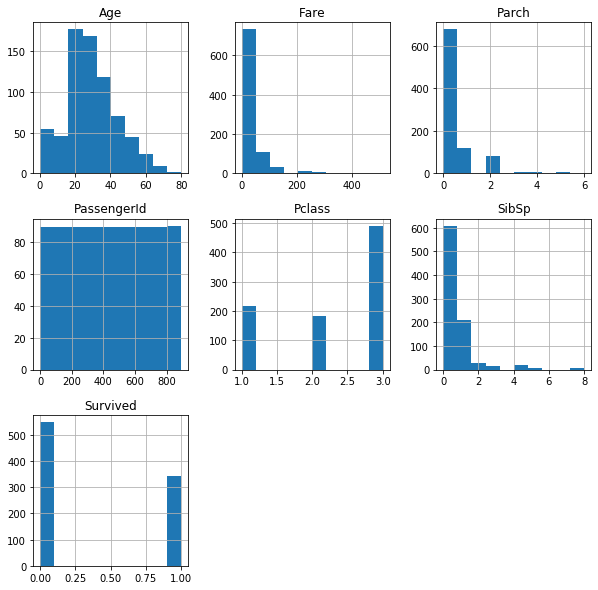

In [10]:

train.hist(figsize=(10,10))
plt.show()

In [280]:
#age=train['Age'].astype(int)
train['Age'].isnull().sum()
train['Age'].mean()
train['Age'].fillna(29,inplace=True)
age=train['Age'].astype(int)

In [281]:
X=train[[ 'Pclass', 'Age', 'SibSp',
       'Parch']]
X=pd.concat([X,gender,embarked], axis=1)

In [120]:
train['Fare']=train['Fare'].astype(int)
train.head(10)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7,1,0,1
1,1,38.0,1,0,71,0,0,0
2,3,26.0,0,0,7,0,0,1
3,1,35.0,1,0,53,0,0,1
4,3,35.0,0,0,8,1,0,1
5,3,NaN,0,0,8,1,1,0
6,1,54.0,0,0,51,1,0,1
7,3,2.0,3,1,21,1,0,1
8,3,27.0,0,2,11,0,0,1
9,2,14.0,1,0,30,0,0,0


In [282]:
X['Age'].mean()
X['Age'].fillna(29, inplace=True)
X.isnull().sum()
y=train['Survived']

In [283]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
model=DecisionTreeClassifier()

In [284]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.3,random_state=4)
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
accuracy_score(ytest,pred)

0.7835820895522388

In [285]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
rmodel=DecisionTreeClassifier()
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.3,random_state=4)
rmodel.fit(xtrain,ytrain)
pred=rmodel.predict(xtest)
accuracy_score(ytest,pred)

0.7835820895522388

In [286]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

In [222]:
print('xtrain=shape : ', xtrain.shape)
print('ytrain=shape : ', ytrain.shape)
#print('Xtest=shape : ', xtest.shape)


xtrain=shape :  (623, 8)
ytrain=shape :  (623,)


1 : 0.6977611940298507
2 : 0.8022388059701493
3 : 0.746268656716418
4 : 0.7947761194029851
5 : 0.7835820895522388
6 : 0.8208955223880597
7 : 0.7873134328358209
8 : 0.7798507462686567
9 : 0.7910447761194029


Text(0, 0.5, 'Accuracy score')

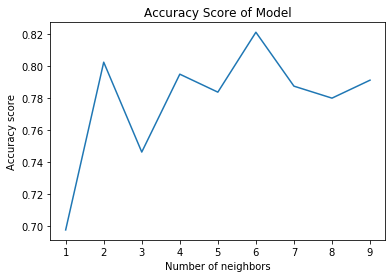

In [290]:
from sklearn.neighbors import KNeighborsClassifier
n=list(range(1,10))
score=[]
for neighbor in n: 
    k_model=KNeighborsClassifier(n_neighbors=neighbor)
    k_model.fit(xtrain,ytrain)
    pred=k_model.predict(xtest)
    score.append(accuracy_score(ytest,pred))
    print(neighbor,':',score[neighbor-1])

plt.plot(n,score)
plt.title('Accuracy Score of Model')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy score')


In [292]:
k_model=KNeighborsClassifier(n_neighbors=6)
k_model.fit(xtrain,ytrain)
pred=k_model.predict(xtest)
accuracy_score(ytest,pred)

0.8208955223880597

In [125]:
ypred=pd.DataFrame(pred)
ypred.to_csv('Survived.csv')

In [155]:
test=pd.read_csv('test.csv')
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [159]:
gender=pd.get_dummies(test['Sex'], drop_first=True)
embarked=pd.get_dummies(test['Embarked'], drop_first=True)

In [162]:
test.drop('Cabin',inplace=True,axis=1)
test.drop('Fare',inplace=True,axis=1)
test.drop('Name',inplace=True,axis=1)
test.drop('Sex',inplace=True,axis=1)
test.drop('Ticket',inplace=True,axis=1)
test.drop('Embarked',inplace=True,axis=1)
test.drop('PassengerId',inplace=True,axis=1)

In [163]:
test.head(10)

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875
5,3,14.0,0,0,9.2250
6,3,30.0,0,0,7.6292
7,2,26.0,1,1,29.0000
8,3,18.0,0,0,7.2292
9,3,21.0,2,0,24.1500


In [164]:
test=pd.concat([test,gender,embarked],axis=1)

In [165]:
test.head(10)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
5,3,14.0,0,0,9.2250,1,0,1
6,3,30.0,0,0,7.6292,0,1,0
7,2,26.0,1,1,29.0000,1,0,1
8,3,18.0,0,0,7.2292,0,0,0
9,3,21.0,2,0,24.1500,1,0,1


In [295]:
test['Fare']=test['Fare'].astype(int)
X.head(10)
test.drop('Fare',inplace=True,axis=1)

In [296]:
test.head(10)

,Pclass,Age,SibSp,Parch,male,Q,S
0,3,34.5,0,0,1,1,0
1,3,47.0,1,0,0,0,1
2,2,62.0,0,0,1,1,0
3,3,27.0,0,0,1,0,1
4,3,22.0,1,1,0,0,1
5,3,14.0,0,0,1,0,1
6,3,30.0,0,0,0,1,0
7,2,26.0,1,1,1,0,1
8,3,18.0,0,0,0,0,0
9,3,21.0,2,0,1,0,1


In [172]:
print('X=shape    : ',X.shape)
print('Test=shape : ',test.shape)

X=shape :  (891, 8)
Test=shape :  (418, 8)


In [181]:
test['Fare'].isnull().sum()
test['Fare'].mean()
test['Fare'].fillna(35,inplace=True)
test.isnull().sum()
test['Age'].mean()
test['Age'].fillna(30,inplace=True)
test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
Q         0
S         0
dtype: int64

In [210]:
y_pred=model.predict(test)


In [219]:
test_pred=pd.DataFrame(y_pred,columns=['Survived'])

In [220]:
test_pred.to_csv('test_pred.csv')

In [221]:
test_pred.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [227]:
r_pred=rmodel.predict(test)
test_rpred=pd.DataFrame(y_pred,columns=['Survived'])
test_rpred.to_csv('test_rpred.csv')

In [297]:
k_pred=k_model.predict(test)
test_kpred=pd.DataFrame(k_pred,columns=['Survived'])
test_kpred.to_csv('test_kpred.csv')